# Exercices
# Cours 3 : Préparation des données
Author: Ricardo Vallejo

# Load DATA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris_Original = pd.read_excel('iris_Data.xls', sheet_name = 'iris_Original')
iris_Original

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


# Exploration de donnes

In [2]:
#Identify if null values, types and columns_names
iris_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
#Identification de labels
labels = iris_Original['species'].value_counts()
print(labels)


versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


# Exercice 1.1 : Normalisation et standardisation iris_Original

In [4]:
#Erase not neccesary columns
iris_Original_X = iris_Original.drop(['Unnamed: 0', 'species'], axis = 1)
iris_Original_y = iris_Original['species']


In [5]:
iris_Original_X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_Original_y.head(5)

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Normalisation

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_Original_X)
iris_Original_min_max = scaler.transform(iris_Original_X) #List

#List to DataFrame
iris_Original_Norm = pd.DataFrame(iris_Original_min_max, columns = ['sepal_length','sepal_width','petal_length','petal_width'])

iris_Original_Norm.head(5)


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [8]:
iris_Original_Norm = pd.concat([iris_Original_Norm, iris_Original['species']], axis = 1)
iris_Original_Norm.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


# Standarisation

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_Original_X)
iris_Original_std = scaler.transform(iris_Original_X)
iris_Original_standarized = pd.DataFrame(iris_Original_std, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_Original_standarized = pd.concat([iris_Original_standarized, iris_Original['species']], axis = 1)
iris_Original_standarized


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


# Standarisation 2n Methode

In [10]:
#RobustScaler

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(iris_Original_X)
iris_Original_robustScaler = transformer.transform(iris_Original_X)
iris_Original_robustScaler = pd.DataFrame(iris_Original_robustScaler, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_Original_robustScaler


,sepal_length,sepal_width,petal_length,petal_width
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


In [11]:
# comparation normalisation et standarisation







## Exercice 1.2 : Normalisation et standardisation iris_Modified

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris_Modified = pd.read_excel('iris_Data.xls', sheet_name = 'iris_Modified')
iris_Modified.head(5)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,10.0,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [13]:
#Identify if null values, types and columns_names
iris_Modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  147 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
#Erase not neccesary columns
iris_Modified_X = iris_Modified.drop(['Unnamed: 0', 'species'], axis = 1)
iris_Modified_y = iris_Modified['species']

In [15]:
iris_Modified_X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,150.000000,150.000000,150.000000
mean,5.835374,3.057333,3.758000,1.428667
std,0.825684,0.435866,1.765298,1.681017
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.350000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,15.000000


# Normalisation

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_Modified_X)
iris_Modified_min_max = scaler.transform(iris_Original_X) #List

#List to DataFrame
iris_Modified_Norm = pd.DataFrame(iris_Modified_min_max, columns = ['sepal_length','sepal_width','petal_length','petal_width'])

iris_Modified_Norm.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.006711
1,0.166667,0.416667,0.067797,0.006711
2,0.111111,0.500000,0.050847,0.006711
3,0.083333,0.458333,0.084746,0.006711
4,0.194444,0.666667,0.067797,0.006711


# Standarisation

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_Original_X)
iris_Modified_std = scaler.transform(iris_Modified_X)
iris_Modified_standarized = pd.DataFrame(iris_Modified_std, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_Modified_standarized = pd.concat([iris_Modified_standarized, iris_Original['species']], axis = 1)
iris_Modified_standarized

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,11.584510,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


# Comparation normalisation et standarisation

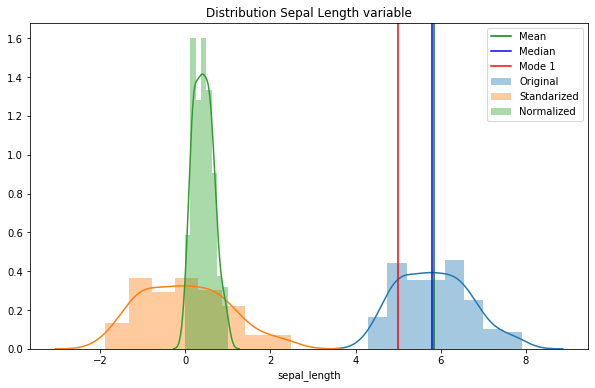

In [18]:

# Calcule numerique
mean=iris_Original_X['sepal_length'].mean();
median=iris_Original_X['sepal_length'].median();
mode=iris_Original_X['sepal_length'].mode();

# Plotting
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(iris_Original_X['sepal_length'], label='Original');
sns.distplot(iris_Original_standarized['sepal_length'], label='Standarized');
sns.distplot(iris_Original_Norm['sepal_length'], label='Normalized');


plt.title('Distribution Sepal Length variable');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend();


# Comparez les résultats obtenus par la normalisation et les standardisation des données iris_Original et iris_Modified.

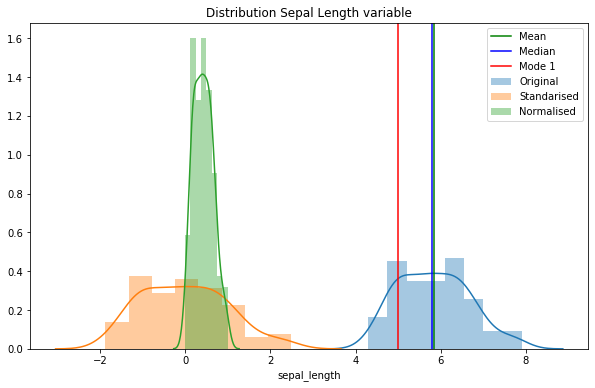

In [19]:

# Calcule numerique
mean=iris_Original_X['sepal_length'].mean();
median=iris_Original_X['sepal_length'].median();
mode=iris_Original_X['sepal_length'].mode();

# Plotting
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(iris_Modified_X['sepal_length'], label='Original');
sns.distplot(iris_Modified_standarized['sepal_length'], label='Standarised');
sns.distplot(iris_Modified_Norm['sepal_length'], label='Normalised');


plt.title('Distribution Sepal Length variable');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend();


# Exercice 2 : Détection des valeurs aberrantes


À partir de la feuille iris_Modified, détectez les données abberantes en utilisant
différentes approches.

In [20]:
iris_Modified.describe()
iris_Modified_X
iris_Original_y


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [21]:
#Le max o min cest loin de median, ilya des aberrantes.  Example petal_width

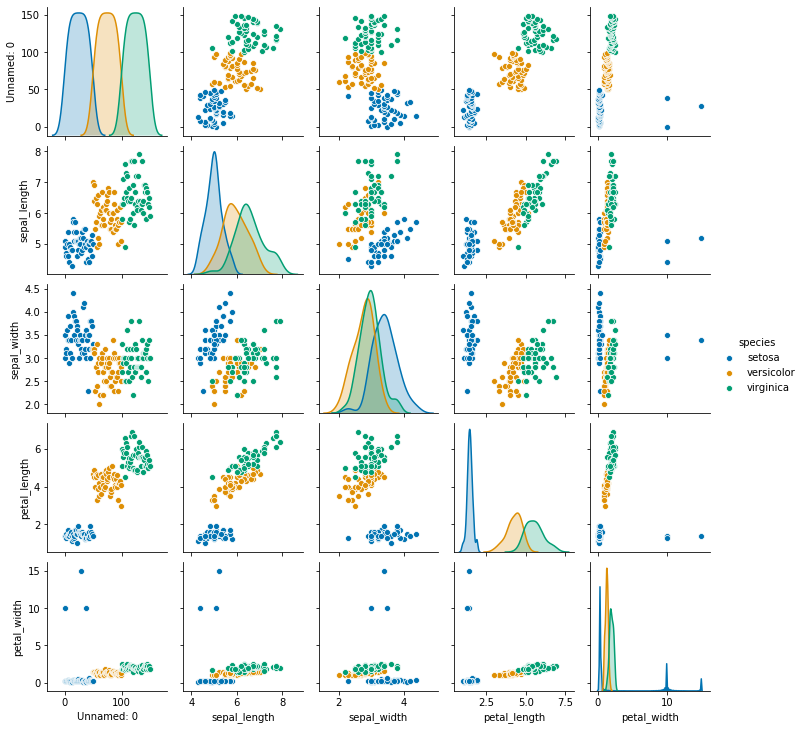

In [22]:
import seaborn as sns
sns.pairplot(iris_Modified, hue='species', height=2, palette='colorblind')

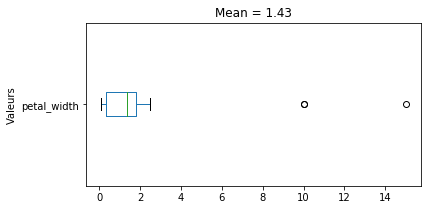

In [23]:
# On peut verifier outliers dans petal-width et verifier avec box-plot sur 10 et 15

#Diagram de moustache
iris_Modified.boxplot(column='petal_width', figsize=(6,3), vert=False)
plt.ylabel("Valeurs")
plt.title("Mean = " + str(round(iris_Modified['petal_width'].mean(),2)))
plt.grid()
plt.show()


In [24]:
# Alors pour les obtenir numeriquement

threshold = 3
data = iris_Modified['petal_width'];
mean = np.mean(data);
sd = np.std(data);

outliersValues = []

for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliersValues.append(i) # add to the empty list
print("mean - Petal width: ", mean)
print("The detected outliers values are: ", outliersValues) 



mean - Petal width:  1.4286666666666679
The detected outliers values are:  [10.0, 15.0, 10.0]


# Using functions to obtain outliers indexes

In [25]:

def is_outlier(value, p25, p75):
    # Check if value is an outlier
    lower = p25 - 1.5 * (p75 - p25)
    upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper


def get_indices_of_outliers(values):
    #Get outlier indices (if any)
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
     
    indices_of_outliers = []
    for ind, value in enumerate(values):
        if is_outlier(value, p25, p75):
            indices_of_outliers.append(ind)
    return indices_of_outliers


indices_of_outliers = get_indices_of_outliers(iris_Modified_X['petal_width'])
indices_of_outliers

[0, 28, 38]

In [26]:
# Imputation donnes aberrantes

iris_Modified_X['petal_width'][indices_of_outliers] = mean
iris_Modified_X['petal_width'][indices_of_outliers]


0     1.428667
28    1.428667
38    1.428667
Name: petal_width, dtype: float64

In [27]:
iris_Modified_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,1.428667
1,4.9,3.0,1.4,0.200000
2,4.7,3.2,1.3,0.200000
3,4.6,3.1,1.5,0.200000
4,5.0,3.6,1.4,0.200000
...,...,...,...,...
145,6.7,3.0,5.2,2.300000
146,6.3,2.5,5.0,1.900000
147,6.5,3.0,5.2,2.000000
148,6.2,3.4,5.4,2.300000


# 1) Based on description

If min max values are far of mean, its is possible existance of aberrrants data.  Petal-widht is the case

In [28]:
iris_Modified.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,147.000000,150.000000,150.000000,150.000000
mean,74.500000,5.835374,3.057333,3.758000,1.428667
std,43.445368,0.825684,0.435866,1.765298,1.681017
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.325000
50%,74.500000,5.800000,3.000000,4.350000,1.350000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,15.000000


# 2) Counting null values and finding indexes

In [29]:
iris_Modified.isnull().sum()

Unnamed: 0      0
sepal_length    3
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [30]:
indexes_nulls = iris_Modified[iris_Modified.isna().any(axis=1)].index
indexes_nulls

Int64Index([10, 70, 130], dtype='int64')

# 3) Styling the table

In [31]:

display(iris_Modified[iris_Modified.isna().any(axis=1)].style.highlight_null('yellow'))


,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
10,10,nan,3.700000,1.500000,0.200000,setosa
70,70,nan,3.200000,4.800000,1.800000,versicolor
130,130,nan,2.800000,6.100000,1.900000,virginica


# Excercise 3.  Valeurs manquantes - Imputation 

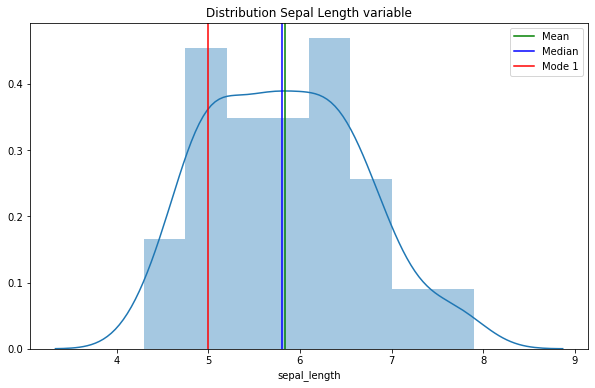

In [32]:
# Calcule numerique
mean=iris_Modified_X['sepal_length'].mean();
median=iris_Modified_X['sepal_length'].median();
mode=iris_Modified_X['sepal_length'].mode();

# Plotting
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(iris_Modified_X['sepal_length']);
plt.title('Distribution Sepal Length variable');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend();

In [33]:
iris_Modified_X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,150.000000,150.000000,150.000000
mean,5.835374,3.057333,3.758000,1.223907
std,0.825684,0.435866,1.765298,0.749233
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.350000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 1) Imputation par une valeur statistique - sepal_length	

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  #Can be "median"
imputer.fit(iris_Modified_X)
Xnew = imputer.transform(iris_Modified_X)
Xnew  = pd.DataFrame(Xnew , columns=iris_Modified_X.columns)
Xnew


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,1.428667
1,4.9,3.0,1.4,0.200000
2,4.7,3.2,1.3,0.200000
3,4.6,3.1,1.5,0.200000
4,5.0,3.6,1.4,0.200000
...,...,...,...,...
145,6.7,3.0,5.2,2.300000
146,6.3,2.5,5.0,1.900000
147,6.5,3.0,5.2,2.000000
148,6.2,3.4,5.4,2.300000


In [35]:
print(Xnew.loc[indexes_nulls])

     sepal_length  sepal_width  petal_length  petal_width
10       5.835374          3.7           1.5          0.2
70       5.835374          3.2           4.8          1.8
130      5.835374          2.8           6.1          1.9


# 2)  Imputation par les k plus proches voisins (k-NN)

In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputer.fit(iris_Modified_X)
Xnew = imputer.transform(iris_Modified_X)
Xnew = pd.DataFrame(Xnew , columns=iris_Modified_X.columns)
print(Xnew.loc[[10, 70, 130]])   #indexes_nulls =  [10, 70, 130]



     sepal_length  sepal_width  petal_length  petal_width
10           5.20          3.7           1.5          0.2
70           6.05          3.2           4.8          1.8
130          7.20          2.8           6.1          1.9


# 3) Imputation iterative

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)
imputer.fit(iris_Modified_X)
Xnew = imputer.transform(iris_Modified_X)
Xnew = pd.DataFrame(Xnew , columns=iris_Modified_X.columns)
print(Xnew.loc[indexes_nulls])



     sepal_length  sepal_width  petal_length  petal_width
10       5.202791          3.7           1.5          0.2
70       6.377568          3.2           4.8          1.8
130      6.858873          2.8           6.1          1.9


In [38]:
# Comentez resultats finaux